# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Haozhe Wang
*   Your **student number**: 



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

In [ ]:
### YOUR CODE HERE ###

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['Goal'].values
X = df.drop('Goal', axis = 1).values

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=1)

# Standardization

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

# Insert the first column of all 1s

X_train_std = np.hstack((np.ones((9625,1)), X_train_std))
X_val_std = np.hstack((np.ones((2062,1)), X_val_std))
X_test_std = np.hstack((np.ones((2063,1)), X_test_std))

**Solution:** 

An iteration means one single pass of batch size data examples, and an epoch is the completion of iterations that pass all the training data examples. One epoch usually takes more than one iteration.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
### YOUR CODE HERE ###

from scipy import linalg
from sklearn.metrics import mean_squared_error

W = np.dot(linalg.inv(np.dot(X_train_std.T, X_train_std)), np.dot(X_train_std.T, y_train))
y_train_pre = np.dot(X_train_std, W)
y_val_pre = np.dot(X_val_std, W)

# RMSE
print('RMSE for training set:', np.sqrt(mean_squared_error(y_train_pre, y_train)))
print('RMSE for validation set:', np.sqrt(mean_squared_error(y_val_pre, y_val)))


RMSE for training set: 0.00017630525201590516
RMSE for validation set: 0.00017357966052740928


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [ ]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

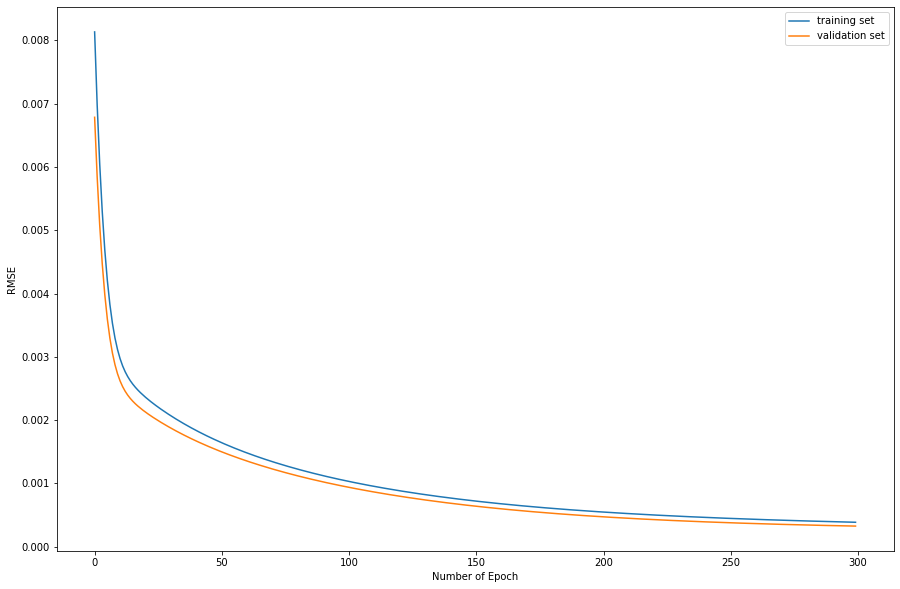

--- Total Training Time: 0.7868192195892334 (s) ---


In [ ]:
import time
import matplotlib.pyplot as plt

start_time = time.time() ## Records current time

# Parameter initialization
rmse_direct = rmse(y_val_pre, y_val)
CT = 1.001*rmse_direct
learning_rate = 0.01
w = (np.random.random(X_train_std.shape[1])/1000)

rmse_train = []
rmse_val = []

for epoch in range (0, 300):
  y_train_pre = np.dot(X_train_std, w.T)
  rmse_train.append(rmse(y_train_pre, y_train))

  gradient = (np.dot(X_train_std.T, y_train_pre - y_train))/len(y_train_pre) 
  w = w - learning_rate * gradient

  y_val_pre = np.dot(X_val_std, w.T)
  rmse_val.append(rmse(y_val_pre, y_val))

  if rmse(y_val_pre, y_val) <= CT:
    break

plt.figure(figsize=(15,10))
plt.plot(rmse_train, label = 'training set')
plt.plot(rmse_val, label = 'validation set')
plt.xlabel("Number of Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## GD Script -- Sample code in tutorial! ##

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

**Analysis:**

The model is said to be overfitted when the training RMSE value is low while validation RMSE is high which is not the case here while it is not underfitted as well because both the training RMSE and validation RMSE is low. So, model is neither overfitting or underfitting.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
### YOUR CODE HERE ###

def MiniBatch_Stochastic_GradientDescent(X_train, y_train, X_val, y_val, batch_size, learning_rate, CT):

  weight = []
  rmse_train = []
  rmse_val = []
  elapsed_time = []

  # Parameter initialization
  start_time = time.time()
  w = (np.random.random(X_train.shape[1])/1000)
  length = X_train.shape[0]
  flag = True   # if RMSE gets larger, break the loop and stop training
  epoch = 0   # no need to check if RMSE gets larger at the first epoch
  rmse_val_cur = CT + 1   # just make rmse_val_cur larger than CT to start running the loop

  while flag and rmse_val_cur >= CT:
    for counter in range(0, length, batch_size):
      X_train_batch = X_train[counter:counter + batch_size]     
      y_train_batch = y_train[counter:counter + batch_size]
      y_batch_pre = np.dot(X_train_batch, w.T)
      gradient = (np.dot(X_train_batch.T, y_batch_pre - y_train_batch))/len(y_batch_pre)
      w = w - learning_rate * gradient

    # Calculate RMSE
    y_train_pre = np.dot(X_train, w.T)
    rmse_train_cur = rmse(y_train_pre, y_train)

    y_val_pre = np.dot(X_val, w.T)
    rmse_val_cur = rmse(y_val_pre, y_val)

    # Check if RMSE gets larger
    if epoch > 0:
      if rmse_val_cur > rmse_val[-1]:
        flag = False
        print('Model diverges with batch size ', batch_size)
        break;

    # Record data
    weight.append(w)
    rmse_train.append(rmse_train_cur)
    rmse_val.append(rmse_val_cur)
    elapsed_time.append(time.time() - start_time)

    permutation = list(np.random.permutation(length))
    X_train = X_train[permutation]
    y_train = y_train[permutation]

    epoch += 1

  total_time = elapsed_time[-1]
  final_w = weight[-1]

  return final_w, rmse_train, rmse_val, elapsed_time, total_time

In [ ]:
learning_rate = 0.01
rmse_direct = rmse(y_val_pre, y_val)
CT = 1.001 * rmse_direct

test_batch_size = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

for bs in test_batch_size:
  final_w, rmse_train, rmse_val, elapsed_time, total_time = MiniBatch_Stochastic_GradientDescent(X_train_std, y_train, X_val_std, y_val, bs, learning_rate, CT)

Model diverges with batch size  2
Model diverges with batch size  4
Model diverges with batch size  8
Model diverges with batch size  16
Model diverges with batch size  32


We could see that a batch size below 32 will cause the divergence of the model.

Therefore, we will try batch sizes beyond 32 when plotting the graph.

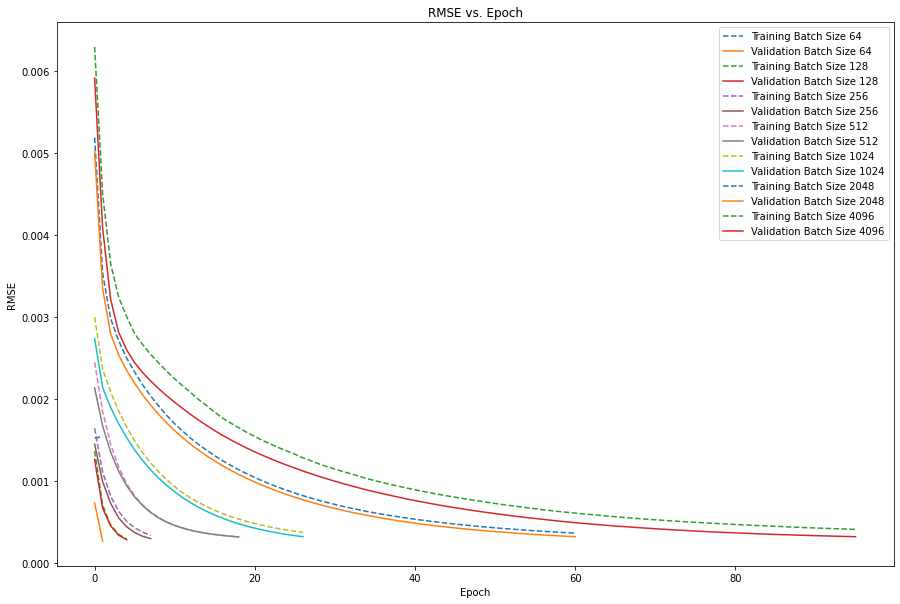

In [ ]:
# RMSE vs. epoch graph for all the converging batch sizes

batch_size_list = [64, 128, 256, 512, 1024, 2048, 4096]

plt.figure(figsize=(15,10))

for bs in batch_size_list:
  final_w, rmse_train, rmse_val, elapsed_time, total_time = MiniBatch_Stochastic_GradientDescent(X_train_std, y_train, X_val_std, y_val, bs, learning_rate, CT)

  plt.title('RMSE vs. Epoch')
  plt.plot(range(len(rmse_train)), rmse_train, label = 'Training Batch Size {}'.format(bs), linestyle = 'dashed') 
  plt.plot(range(len(rmse_val)), rmse_val, label = 'Validation Batch Size {}'.format(bs)) 
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()

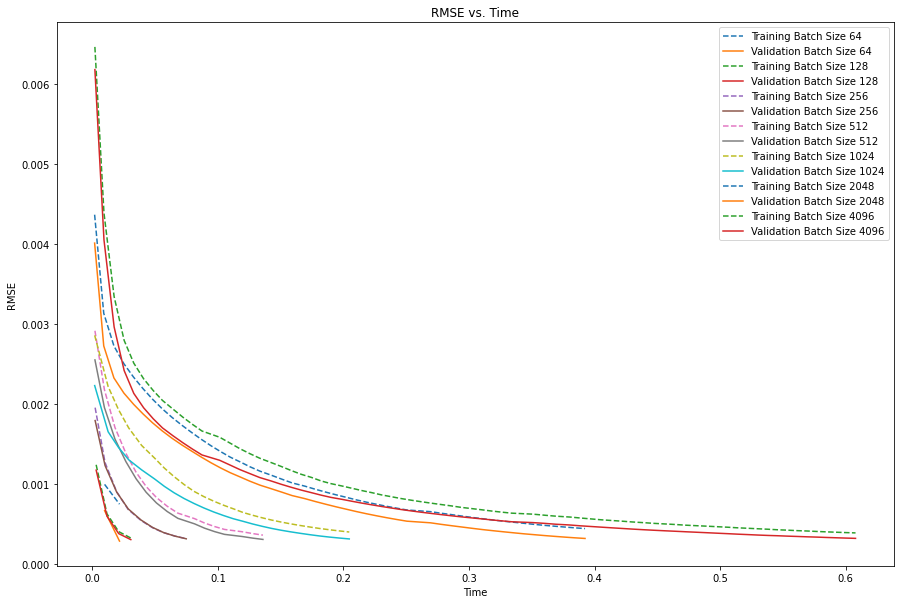

In [ ]:
# RMSE vs. time for all the converging batch sizes

batch_size_list = [64, 128, 256, 512, 1024, 2048, 4096]

plt.figure(figsize=(15,10))

for bs in batch_size_list:
  final_w, rmse_train, rmse_val, elapsed_time, total_time = MiniBatch_Stochastic_GradientDescent(X_train_std, y_train, X_val_std, y_val, bs, learning_rate, CT)

  plt.title('RMSE vs. Time')
  plt.plot(elapsed_time, rmse_train, label = 'Training Batch Size {}'.format(bs), linestyle = 'dashed') 
  plt.plot(elapsed_time, rmse_val, label = 'Validation Batch Size {}'.format(bs)) 
  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.legend()

Model diverges with batch size  2
Model diverges with batch size  4
Model diverges with batch size  8
Model diverges with batch size  16
Model diverges with batch size  32


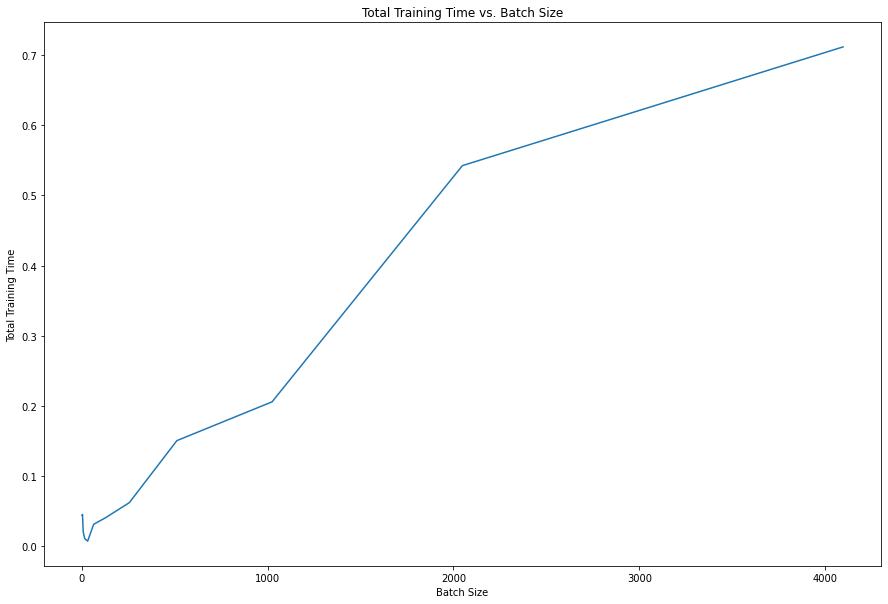

In [ ]:
# Total training time (y-axis) vs. Batch size (x-axis)

batch_size_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
total_time_list = []

plt.figure(figsize=(15,10))

for bs in batch_size_list:
  final_w, rmse_train, rmse_val, elapsed_time, total_time = MiniBatch_Stochastic_GradientDescent(X_train_std, y_train, X_val_std, y_val, bs, learning_rate, CT)
  total_time_list.append(total_time)

plt.title('Total Training Time vs. Batch Size')
plt.plot(batch_size_list, total_time_list) 
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time')
plt.show()

**Analysis:**

1. Convergence and divergence

  We have tried various batch sizes from 2 to 1024, and the result indicates that the model may diverge with a batch size small than 32. In some rare conditions, the model could also diverge with batch sizes of 64 and 128 due to unknown random factors, but in most cases, convergence is observed.

2. RMSE vs. epoch

  We could see that the model will converge faster (fewer epochs) with smaller batch size, or relatively slower (more epochs) with larger batch size. As far as we could know, a smaller batch size will bring about more noise in the data than a larger batch size, which accidentally helps the model to find a better global optimum with relatively fewer epochs rather than stuck in the local optimum. Certainly, there is still a little bit underfitting problem remained, as mentioned in Part 3, but it gradually vanishes when the number of epochs increases. Models of batch size 64 and 128 perform pretty well.

3. RMSE vs. time

  We could notice that the model will converge faster (less time) with smaller batch size, or relatively slower (more time) with larger batch size. It is the same reason of smaller batch size that helps the model converge. Models of batch size 64 and 128 also perform pretty well in this part.

4. Total Training Time vs. Batch Size

  Generally speaking, the total training time will increase along with the number of batch sizes. Particularly, the best batch size seems to be 128, which wins with a small advantage in total training time compared to the model of batch size 64. When batch size goes beyond 128, the total training time significantly increases all the way up.

## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

In [ ]:
### YOUR CODE HERE ###

def Momentum_GradientDescent(X_train, y_train, X_val, y_val, batch_size, learning_rate, CT, beta):

  weight = []
  rmse_train = []
  rmse_val = []
  elapsed_time = []

  # Parameter initialization
  start_time = time.time()
  w = (np.random.random(X_train.shape[1])/1000)
  length = X_train.shape[0]
  flag = True   # if RMSE gets larger, break the loop and stop training
  epoch = 0   # no need to check if RMSE gets larger at the first epoch
  rmse_val_cur = CT + 1   # just make rmse_val_cur larger than CT to start running the loop
  gt = np.zeros(X_train.shape[1])

  while flag and rmse_val_cur >= CT:
    for counter in range(0, length, batch_size):
      X_train_batch = X_train[counter:counter + batch_size]     
      y_train_batch = y_train[counter:counter + batch_size]
      y_batch_pre = np.dot(X_train_batch, w.T)
      gradient = (np.dot(X_train_batch.T, y_batch_pre - y_train_batch))/len(y_batch_pre)

      # Here we apply momentum
      # If beta = 0, then gt = gradient
      gt = beta * gt + (1 - beta) * gradient
      w = w - learning_rate * gt

    # Calculate RMSE
    y_train_pre = np.dot(X_train, w.T)
    rmse_train_cur = rmse(y_train_pre, y_train)

    y_val_pre = np.dot(X_val, w.T)
    rmse_val_cur = rmse(y_val_pre, y_val)

    # Check if RMSE gets larger
    if epoch > 0:
      if rmse_val_cur > rmse_val[-1]:
        flag = False
        break;

    # Record data
    weight.append(w)
    rmse_train.append(rmse_train_cur)
    rmse_val.append(rmse_val_cur)
    elapsed_time.append(time.time() - start_time)

    permutation = list(np.random.permutation(length))
    X_train = X_train[permutation]
    y_train = y_train[permutation]

    epoch += 1

  total_time = elapsed_time[-1]
  final_w = weight[-1]

  return final_w, rmse_train, rmse_val, elapsed_time, total_time

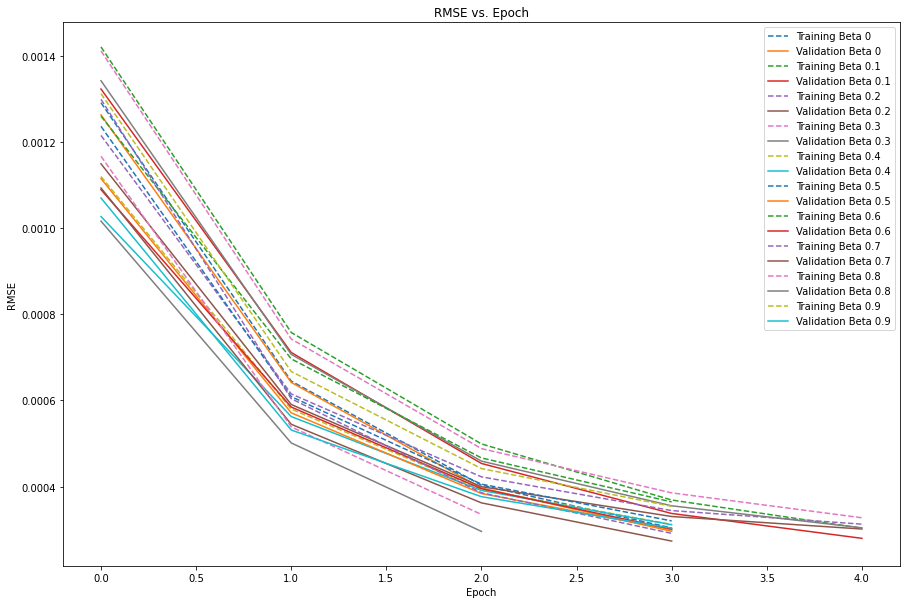

In [ ]:
# RMSE for each epoch

learning_rate = 0.01
batch_size = 128
rmse_direct = rmse(y_val_pre, y_val)
CT = 1.001 * rmse_direct

beta_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(15,10))

for beta in beta_list:
  final_w, rmse_train, rmse_val, elapsed_time, total_time = Momentum_GradientDescent(X_train_std, y_train, X_val_std, y_val, batch_size, learning_rate, CT, beta)

  plt.title('RMSE vs. Epoch')
  plt.plot(range(len(rmse_train)), rmse_train, label = 'Training Beta {}'.format(beta), linestyle = 'dashed') 
  plt.plot(range(len(rmse_val)), rmse_val, label = 'Validation Beta {}'.format(beta)) 
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()

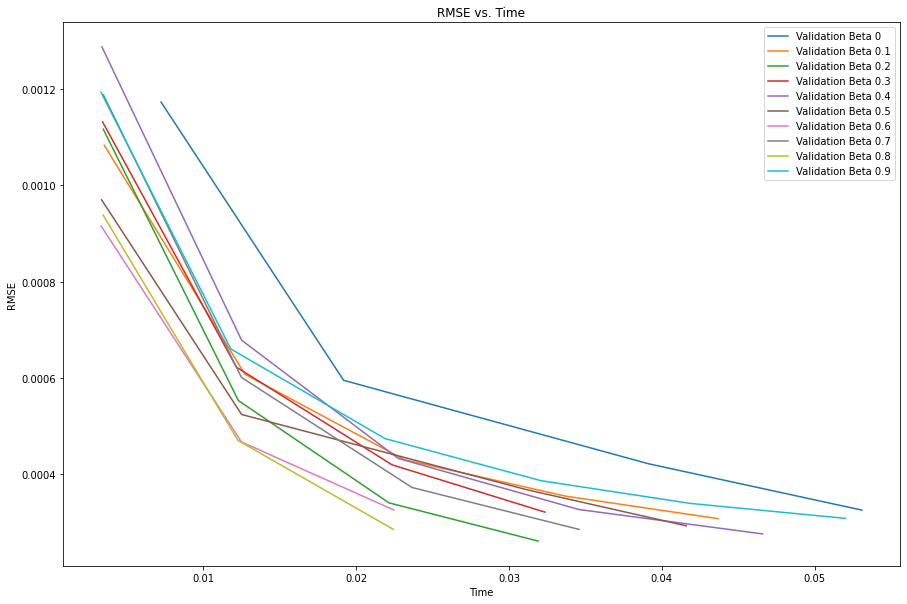

In [ ]:
plt.figure(figsize=(15,10))

for beta in beta_list:
  final_w, rmse_train, rmse_val, elapsed_time, total_time = Momentum_GradientDescent(X_train_std, y_train, X_val_std, y_val, batch_size, learning_rate, CT, beta)

  plt.title('RMSE vs. Time')
  plt.plot(elapsed_time, rmse_val, label = 'Validation Beta {}'.format(beta)) 
  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.legend()

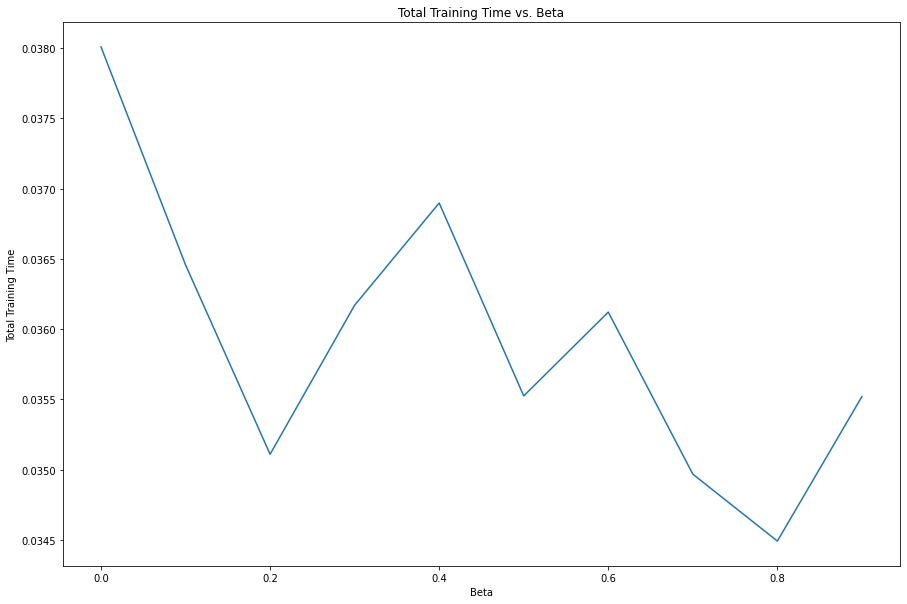

,Beta,Total Training Time
8,0.8,0.034491
7,0.7,0.034968
2,0.2,0.035109
9,0.9,0.035520
5,0.5,0.035524
6,0.6,0.036121
3,0.3,0.036170
1,0.1,0.036457
4,0.4,0.036898
0,0.0,0.038009


In [ ]:
plt.figure(figsize=(15,10))

total_time_list = []

for beta in beta_list:
  total_time_record = []

  for counter in range(50):
    final_w, rmse_train, rmse_val, elapsed_time, total_time = Momentum_GradientDescent(X_train_std, y_train, X_val_std, y_val, batch_size, learning_rate, CT, beta)  
    total_time_record.append(total_time)

  total_time_list.append(sum(total_time_record)/float(len(total_time_record)))

plt.title('Total Training Time vs. Beta')
plt.plot(beta_list, total_time_list) 
plt.xlabel('Beta')
plt.ylabel('Total Training Time')
plt.show()

momentum_time_data = {'Beta':beta_list, 'Total Training Time':total_time_list}
momentum_time_table = pd.DataFrame(data = momentum_time_data)
momentum_time_table.sort_values(by = ['Total Training Time'], ascending = True)

**Analysis:**

According to the plot and table above, we could see that momentum has a noticeable positive effect on reducing the training time of the model.

Due to unknown random factors, the total training time for the same model seems to fluctuate from time to time, so here we have every model run for 50 times and calculate their average running time as the total training time of the corresponding model.

Compared with the original gradient descent model (beta = 0), models with momentum (beta > 0) could converge evidently faster, but still at various rates due to different beta settings. The best beta is supposed to be 0.8.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

In [ ]:
### YOUR CODE HERE ###

def Momentum_GradientDescent(X_train, y_train, X_val, y_val, batch_size, learning_rate, CT, beta):

  weight = []
  rmse_train = []
  rmse_val = []
  elapsed_time = []

  # Parameter initialization
  start_time = time.time()
  w = (np.random.random(X_train.shape[1])/1000)
  length = X_train.shape[0]
  flag = True   # if RMSE gets larger, break the loop and stop training
  epoch = 0   # no need to check if RMSE gets larger at the first epoch
  rmse_val_cur = CT + 1   # just make rmse_val_cur larger than CT to start running the loop
  gt = np.zeros(X_train.shape[1])

  while flag and rmse_val_cur >= CT:
    for counter in range(0, length, batch_size):
      X_train_batch = X_train[counter:counter + batch_size]     
      y_train_batch = y_train[counter:counter + batch_size]
      y_batch_pre = np.dot(X_train_batch, w.T)
      gradient = (np.dot(X_train_batch.T, y_batch_pre - y_train_batch))/len(y_batch_pre)

      # Here we apply momentum
      # If beta = 0, then gt = gradient
      gt = beta * gt + (1 - beta) * gradient
      w = w - learning_rate * gt

    # Calculate RMSE
    y_train_pre = np.dot(X_train, w.T)
    rmse_train_cur = rmse(y_train_pre, y_train)

    y_val_pre = np.dot(X_val, w.T)
    rmse_val_cur = rmse(y_val_pre, y_val)

    # Check if RMSE gets larger
    if epoch > 0:
      if rmse_val_cur > rmse_val[-1]:
        flag = False
        break;

    # Record data
    weight.append(w)
    rmse_train.append(rmse_train_cur)
    rmse_val.append(rmse_val_cur)
    elapsed_time.append(time.time() - start_time)

    permutation = list(np.random.permutation(length))
    X_train = X_train[permutation]
    y_train = y_train[permutation]

    epoch += 1

  total_time = elapsed_time[-1]
  final_w = weight[-1]

  return final_w, rmse_train, rmse_val, elapsed_time, total_time

In [ ]:
learning_rate = 0.01
batch_size = 128
beta = 0.8

final_w, rmse_train, rmse_test, elapsed_time, total_time = Momentum_GradientDescent(X_train_std, y_train, X_test_std, y_test, batch_size, learning_rate, CT, beta)

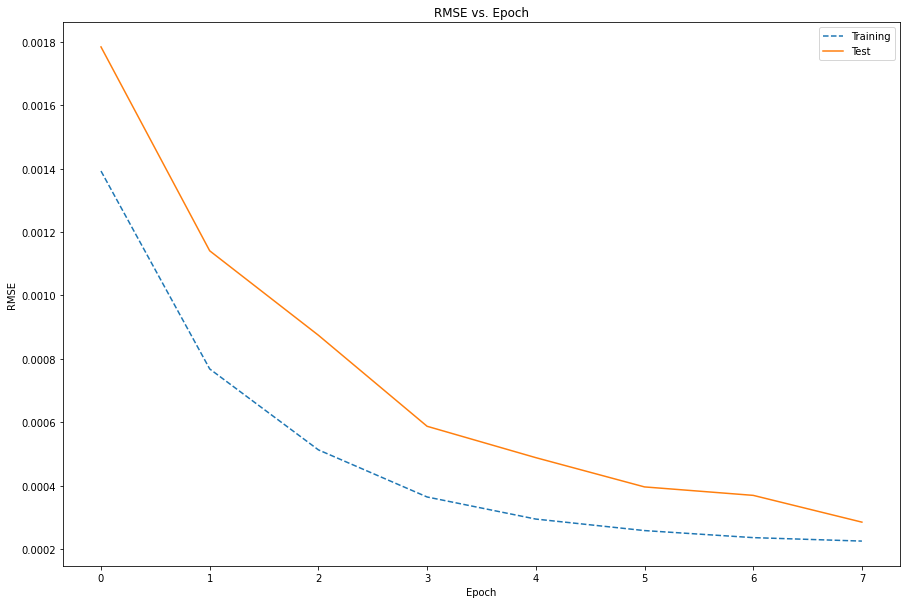

In [ ]:
plt.figure(figsize=(15,10))
plt.title('RMSE vs. Epoch')
plt.plot(range(len(rmse_train)), rmse_train, label = 'Training', linestyle = 'dashed') 
plt.plot(range(len(rmse_test)), rmse_test, label = 'Test') 
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

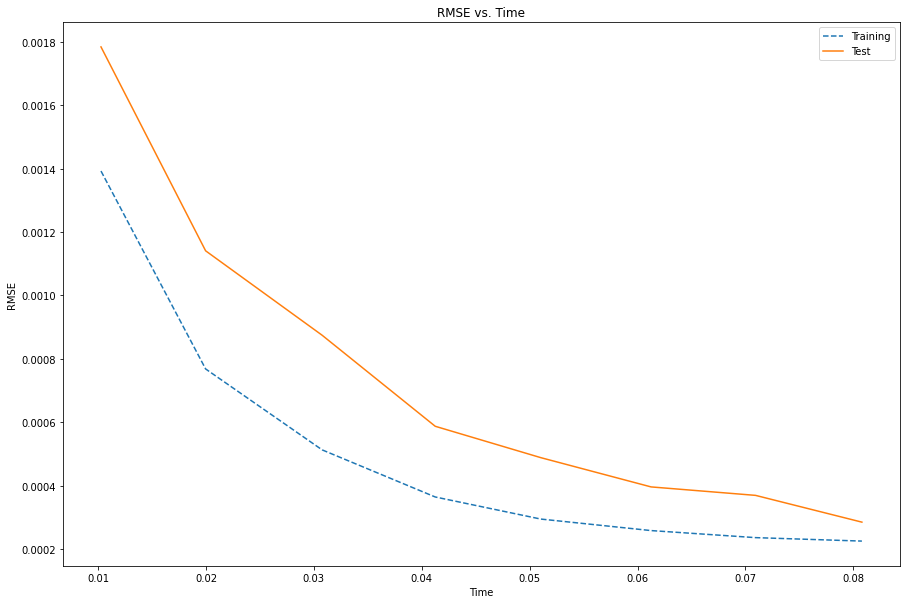

In [ ]:
plt.figure(figsize=(15,10))
plt.title('RMSE vs. Time')
plt.plot(elapsed_time, rmse_train, label = 'Training', linestyle = 'dashed') 
plt.plot(elapsed_time, rmse_test, label = 'Test') 
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
plt.figure(figsize=(15,10))

for counter in range(50):
  final_w, rmse_train, rmse_val, elapsed_time, total_time = Momentum_GradientDescent(X_train_std, y_train, X_val_std, y_val, batch_size, learning_rate, CT, beta)  
  total_time_record.append(total_time)

avg_total_time = sum(total_time_record)/float(len(total_time_record))

print("Average total time on test set:", avg_total_time)


Average total time on test set: 0.03586521069208781


<Figure size 1080x720 with 0 Axes>

**Model Setting:**

Gradient Descent Model with Momentum

learning_rate = 0.01

batch_size = 128

beta = 0.8


**Summary:**

From the previous part 4, we observed models with different batch sizes and performance, Some of them simply fail to converge, while others perform variously due to their batch sizes. After serious analysis, 128 is picked up as the best batch size for the model and dataset of this project.

Based on the experimental result of part 5, we could easily draw the conclusion that the momentum technique exerts a significant positive influence on the training time of the gradient descent model. Here we take 0.8 as the best beta setting.

Additionally, in the previous part of the project, there always exists certain degree of underfitting problem when training the model. But when testing on the test set in part 6, it comes up with overfitting problem unexpectedly.

Generally, it has been shown that the model will perform best with the parameter setting above.